In [1]:
# استيراد المكتبات اللازمة
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# تعريف البيئة
n_rows = 5  # عدد الصفوف في الشبكة
n_cols = 5  # عدد الأعمدة في الشبكة
n_states = n_rows * n_cols  # إجمالي عدد الحالات في الشبكة

In [3]:
goal_state = n_rows*n_cols-1  # حالة الهدف (الزاوية السفلى اليمنى)

In [4]:
n_actions = 4  # عدد الأفعال الممكنة (أعلى، أسفل، يسار، يمين)

In [5]:
# تهيئة جدول Q بقيم صفرية
Q_table = np.zeros((n_states, n_actions))
# تعريف المعاملات
learning_rate = 0.8  # معدل التعلم
discount_factor = 0.95  # عامل الخصم للمكافآت المستقبلية
exploration_prob = 0.2  # احتمال الاستكشاف
epochs = 100  # عدد حلقات التدريب

In [6]:
# دالة لتحويل حالة معينة إلى إحداثيات (صف، عمود) في الشبكة
def state_to_position(state):
    return (state // n_cols, state % n_cols)

In [7]:
# دالة لتحويل إحداثيات (صف، عمود) إلى حالة معينة
def position_to_state(row, col):
    return row * n_cols + col

In [8]:

# دالة للحصول على الحالة التالية بناءً على الحالة الحالية والفعل
def get_next_state(current_state, action):
    row, col = state_to_position(current_state)

    # تحديد الحركة بناءً على الفعل المختار
    if action == 0:  # الحركة إلى الأعلى
        row -= 1
    elif action == 1:  # الحركة إلى الأسفل
        row += 1
    elif action == 2:  # الحركة إلى اليسار
        col -= 1
    elif action == 3:  # الحركة إلى اليمين
        col += 1

    # التأكد من بقاء العميل ضمن حدود الشبكة
    row = max(0, min(row, n_rows - 1))
    col = max(0, min(col, n_cols - 1))
    # الحالة التالية
    next_state = position_to_state(row, col)
    return next_state

In [9]:
# خوارزمية Q-learning
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states-1)  # البداية من حالة عشوائية
    # استمر في التحرك حتى الوصول إلى الهدف
    while current_state != goal_state:
        # اختيار الفعل باستخدام استراتيجية epsilon-greedy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # استكشاف
        else:
            action = np.argmax(Q_table[current_state])  # استخدام المعرفة الحالية

        # الحصول على الحالة التالية بناءً على الفعل المختار
        next_state = get_next_state(current_state, action)

        # تعريف دالة المكافآت: عقوبة صغيرة لكل حركة، ومكافأة كبيرة للوصول إلى الهدف
        reward = -1  # عقوبة على كل حركة
        if next_state == goal_state:
            reward = 100  # مكافأة للوصول إلى الهدف

        # تحديث قيمة Q باستخدام قاعدة التحديث الخاصة بـ Q-learning
        Q_table[current_state, action] = (1 - learning_rate) * Q_table[current_state, action] + \
                learning_rate * (reward + discount_factor * np.max(Q_table[next_state]))


        current_state = next_state  # الانتقال إلى الحالة التالية

# بعد التدريب، يمثل جدول Q القيم التي تم تعلمها
print("ََQ Table:")
print(Q_table)

ََQ Table:
[[ -4.47530384  56.68880888  -4.34484421  29.21624494]
 [ -3.69254605  -3.78490675  -4.2136182   65.8692697 ]
 [ -3.0130688   -3.2001536   -2.9823488   72.81928263]
 [ -2.452736    77.74070857  53.86785674  -2.950144  ]
 [ -3.0130688   82.86850218  -2.3296      -3.0130688 ]
 [ -3.69254605  68.12132543  43.57282514  -3.88737434]
 [ -4.0805541   57.65768666  -3.94723828  -3.17797376]
 [ -3.25665382  -2.452736    -3.036416    77.73421585]
 [ -2.422016    82.885       57.20117001  65.84605877]
 [ 60.50366038  88.29999814  70.72843831  65.73628996]
 [ 43.62320356  -3.067136    -3.0130688   72.8535252 ]
 [ -2.9823488   46.39624733  53.79189763  77.74074993]
 [ -2.30528     72.42548036  57.7785514   82.885     ]
 [ 74.37641365  87.53088727  -1.568       88.3       ]
 [ 52.01519206  94.          82.74968064  88.15619554]
 [ -2.7795968   -3.21999872  42.68431674  76.91498576]
 [ 57.80326817  82.88462792  -2.422016    -2.36032   ]
 [ 77.740749    -1.6         61.5843917   70.32606769]

In [10]:
# دالة لإيجاد أقصر مسار
def find_path(Q_table, start_state, goal_state):
    current_state = start_state
    path = [current_state]  # قائمة لتخزين الحالات في المسار

    while current_state != goal_state:  # استمر في البحث حتى الوصول إلى الهدف
        # اختيار أفضل فعل
        action = np.argmax(Q_table[current_state])  # الفعل الذي يحتوي على أعلى قيمة

        # الحصول على الحالة التالية بناءً على الفعل المختار
        next_state = get_next_state(current_state, action)

        # إضافة الحالة التالية إلى المسار
        path.append(next_state)

        # تحديث الحالة الحالية
        current_state = next_state

        # التوقف إذا تم الوصول إلى الهدف
        if current_state == goal_state:
            break

    return path


In [11]:
#Long Time
start_state = 0  # حالة البداية (الزاوية العليا اليسرى)
# إيجاد المسار من حالة البداية إلى حالة الهدف
path = find_path(Q_table, start_state, goal_state)
print("\nPath from {} to goal {}:".format(start_state, goal_state))
print(path)


Path from 0 to goal 24:
[0, 5, 10, 11, 12, 13, 14, 19, 24]


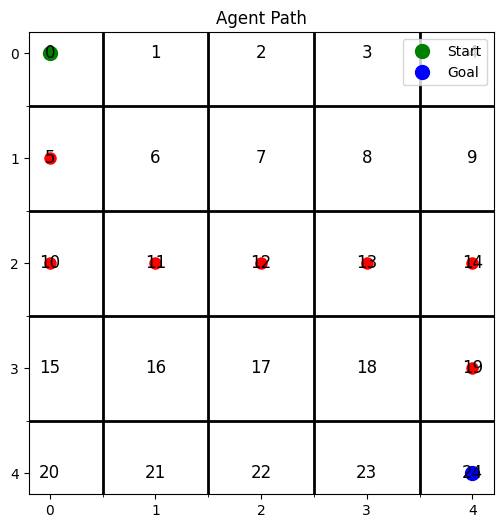

In [12]:
# دالة لرسم الشبكة وعرض المسار
def plot_grid(n_rows, n_cols, path, start_state, goal_state):

    # رسم الشبكة
    fig, ax = plt.subplots(figsize=(6, 6))
    # إنشاء شبكة
    ax.set_xticks(np.arange(n_cols + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(n_rows + 1) - 0.5, minor=True)
    ax.grid( which='minor',color='black', linestyle='-', linewidth=2)

    # كتابة الحالات
    for i in range(n_rows):
        for j in range(n_cols):
            ax.text(j, i, str(i * n_cols + j), ha='center', va='center', fontsize=12, color='black')

    plt.gca().invert_yaxis()  # عكس محور Y ليتوافق مع الشبكة


    # رسم المسار كدوائر حمراء
    path_positions = [state_to_position(state) for state in path]
    for (row, col) in path_positions:
        ax.plot(col, row, 'ro', markersize=8)

     # تحديد مواقع البداية والهدف
    start_row, start_col = state_to_position(start_state)
    goal_row, goal_col = state_to_position(goal_state)
    ax.plot(start_col, start_row, 'go', markersize=10, label="Start")  # بداية
    ax.plot(goal_col, goal_row, 'bo', markersize=10, label="Goal")  # هدف

    # إضافة العناوين
    ax.set_title("Agent Path")
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(np.arange(0, n_cols ))
    ax.set_yticklabels(np.arange(0, n_rows ))
    # مفتاح الرسم
    ax.legend()

    plt.show()

# رسم المسار الذي تعلمه العميل في الشبكة
plot_grid(n_rows, n_cols, path, start_state, goal_state)